<a href="https://colab.research.google.com/github/Andron00e/RandomTasks/blob/main/rl_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import gym
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
np.set_printoptions(precision=3, linewidth=120)

In [2]:
env = gym.make('MountainCar-v0')
env.seed(505);

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

In [4]:
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [5]:
state = env.reset()
score = 0
for t in range(200):
    action = env.action_space.sample()
    env.render()
    state, reward, done, _ = env.step(action)
    score += reward
    if done:
        break 
print('Final score:', score)
env.close()

Final score: -200.0


In [6]:
print("State space:", env.observation_space)
print("- low:", env.observation_space.low)
print("- high:", env.observation_space.high)

State space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
- low: [-1.2  -0.07]
- high: [0.6  0.07]


In [7]:
print("State space samples:")
print(np.array([env.observation_space.sample() for i in range(10)]))

State space samples:
[[ 0.39   0.02 ]
 [-0.989 -0.051]
 [-0.778 -0.028]
 [ 0.032  0.057]
 [-1.182  0.031]
 [-0.522 -0.043]
 [-0.758 -0.022]
 [-0.496 -0.034]
 [-0.433 -0.029]
 [ 0.373 -0.068]]


In [8]:
print("Action space:", env.action_space)

print("Action space samples:")
print(np.array([env.action_space.sample() for i in range(10)]))

Action space: Discrete(3)
Action space samples:
[0 0 1 2 2 2 0 2 0 1]


**exmpl**

`low = [-1.0, -5.0]`, `high = [1.0, 5.0]`,
`bins = (10, 10)`

```
[array([-0.8, -0.6, -0.4, -0.2,  0.0,  0.2,  0.4,  0.6,  0.8]),
 array([-4.0, -3.0, -2.0, -1.0,  0.0,  1.0,  2.0,  3.0,  4.0])]
```

In [11]:
def create_uniform_grid(low, high, bins=(10, 10)):
  x_grid_len = (high[0] - low[0])/(bins[0]*1.0)
  y_grid_len = (high[1] - low[1])/(bins[1]*1.0)
  x_grid = [low[0]+i*x_grid_len for i in range(1, bins[0])]
  y_grid = [low[1]+i*y_grid_len for i in range(1, bins[1])]
  
  return [np.array(x_grid), np.array(y_grid)]


low = [-1.0, -5.0]
high = [1.0, 5.0]
create_uniform_grid(low, high)  # [test]

[array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]),
 array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])]

In [12]:
def discretize(sample, grid):
  x = np.digitize(np.array([sample[0]]), grid[0], right=False)
  y = np.digitize(np.array([sample[1]]), grid[1], right=False)
  
  return [x[0], y[0]]


grid = create_uniform_grid([-1.0, -5.0], [1.0, 5.0])
print('grid: {}'.format(grid))
samples = np.array(
    [[-1.0 , -5.0],
     [-0.81, -4.1],
     [-0.8 , -4.0],
     [-0.5 ,  0.0],
     [ 0.2 , -1.9],
     [ 0.8 ,  4.0],
     [ 0.81,  4.1],
     [ 1.0 ,  5.0]])
discretized_samples = np.array([discretize(sample, grid) for sample in samples])
print("\nSamples:", repr(samples), sep="\n")
print("\nDiscretized samples:", repr(discretized_samples), sep="\n")

grid: [array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]), array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])]

Samples:
array([[-1.  , -5.  ],
       [-0.81, -4.1 ],
       [-0.8 , -4.  ],
       [-0.5 ,  0.  ],
       [ 0.2 , -1.9 ],
       [ 0.8 ,  4.  ],
       [ 0.81,  4.1 ],
       [ 1.  ,  5.  ]])

Discretized samples:
array([[0, 0],
       [0, 0],
       [1, 1],
       [2, 5],
       [5, 3],
       [9, 9],
       [9, 9],
       [9, 9]])


grid_extended: [[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
 [-5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5. ]]
grid_centers: [[-0.9 -0.7 -0.5 -0.3 -0.1  0.1  0.3  0.5  0.7  0.9]
 [-4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5]]
locs: [[-0.9 -4.5]
 [-0.9 -4.5]
 [-0.7 -3.5]
 [-0.5  0.5]
 [ 0.1 -1.5]
 [ 0.9  4.5]
 [ 0.9  4.5]
 [ 0.9  4.5]]


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


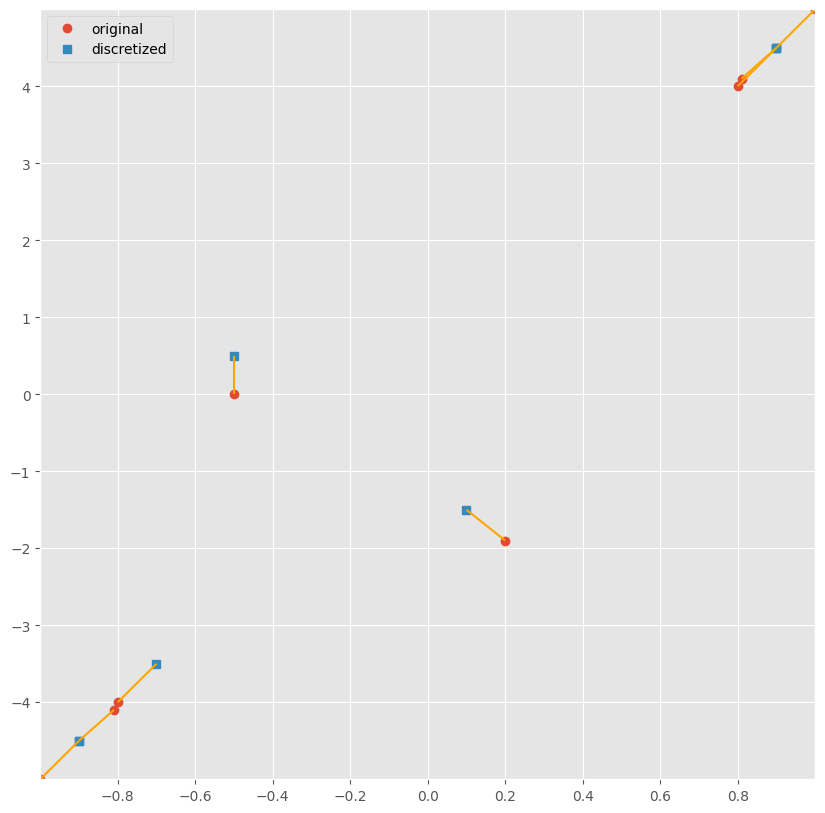

In [13]:
import matplotlib.collections as mc

def visualize_samples(samples, discretized_samples, grid, low=None, high=None):

  fig, ax = plt.subplots(figsize=(10, 10))
  
  ax.xaxis.set_major_locator(plt.FixedLocator(grid[0]))
  ax.yaxis.set_major_locator(plt.FixedLocator(grid[1]))
  ax.grid(True)
  
  if low is not None and high is not None:
      ax.set_xlim(low[0], high[0])
      ax.set_ylim(low[1], high[1])
  else:
      low = [splits[0] for splits in grid]
      high = [splits[-1] for splits in grid]

  grid_extended = np.hstack((np.array([low]).T, grid, np.array([high]).T))  # add low and high ends
  print('grid_extended: {}'.format(grid_extended))
  grid_centers = (grid_extended[:, 1:] + grid_extended[:, :-1]) / 2  # compute center of each grid cell
  print('grid_centers: {}'.format(grid_centers))
  locs = np.stack(grid_centers[i, discretized_samples[:, i]] for i in range(len(grid))).T  # map discretized samples
  print('locs: {}'.format(locs))
  
  ax.plot(samples[:, 0], samples[:, 1], 'o')  
  ax.plot(locs[:, 0], locs[:, 1], 's') 
  ax.add_collection(mc.LineCollection(list(zip(samples, locs)), colors='orange')) 
  ax.legend(['original', 'discretized'])

    
visualize_samples(samples, discretized_samples, grid, low, high)

In [14]:
state_grid = create_uniform_grid(env.observation_space.low, env.observation_space.high, bins=(10, 10))
state_grid

[array([-1.02, -0.84, -0.66, -0.48, -0.3 , -0.12,  0.06,  0.24,  0.42]),
 array([-0.056, -0.042, -0.028, -0.014,  0.   ,  0.014,  0.028,  0.042,  0.056])]

grid_extended: [[-1.2   -1.02  -0.84  -0.66  -0.48  -0.3   -0.12   0.06   0.24   0.42   0.6  ]
 [-0.07  -0.056 -0.042 -0.028 -0.014  0.     0.014  0.028  0.042  0.056  0.07 ]]
grid_centers: [[-1.11  -0.93  -0.75  -0.57  -0.39  -0.21  -0.03   0.15   0.33   0.51 ]
 [-0.063 -0.049 -0.035 -0.021 -0.007  0.007  0.021  0.035  0.049  0.063]]
locs: [[-0.75   0.049]
 [-0.57   0.007]
 [-0.03   0.063]
 [ 0.33  -0.035]
 [-0.93  -0.021]
 [ 0.33   0.063]
 [-0.57   0.035]
 [-0.03  -0.021]
 [-0.39  -0.063]
 [-0.75   0.021]]


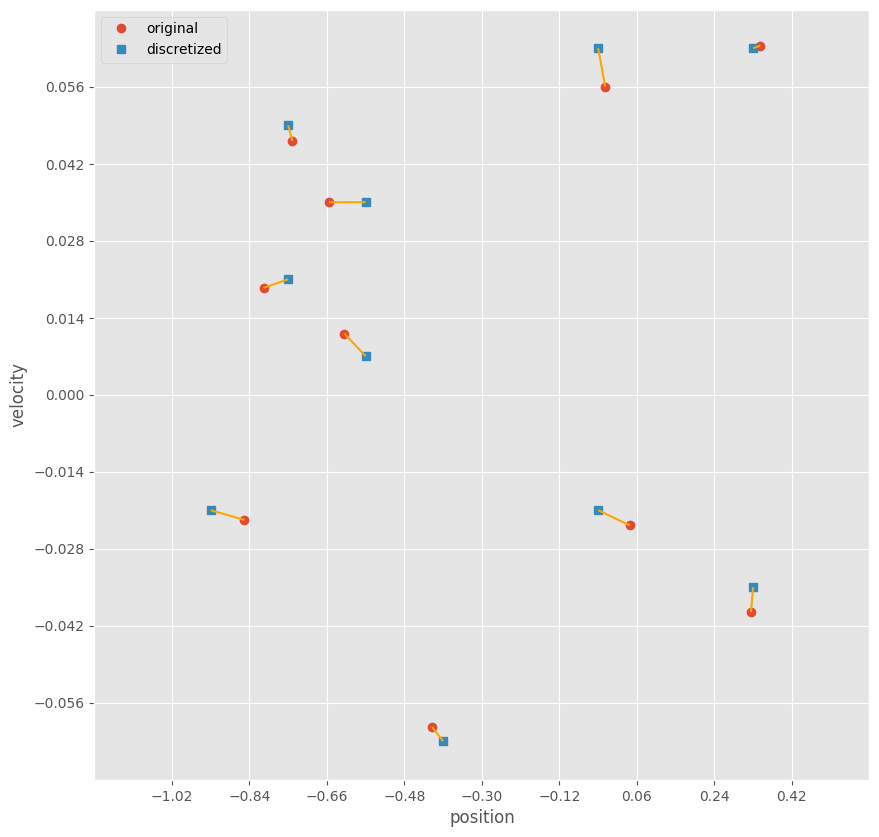

In [15]:
state_samples = np.array([env.observation_space.sample() for i in range(10)])
discretized_state_samples = np.array([discretize(sample, state_grid) for sample in state_samples])
visualize_samples(state_samples, discretized_state_samples, state_grid,
                  env.observation_space.low, env.observation_space.high)
plt.xlabel('position'); plt.ylabel('velocity'); 

In [16]:
class QLearningAgent:

    def __init__(self, env, state_grid, alpha=0.02, gamma=0.99,
                 epsilon=1.0, epsilon_decay_rate=0.9995, min_epsilon=.01, seed=505):
      self.env = env
      self.state_grid = state_grid
      self.state_size = tuple(len(splits) + 1 for splits in self.state_grid)
      self.action_size = self.env.action_space.n 
      self.seed = np.random.seed(seed)
      print("Environment:", self.env)
      print("State space size:", self.state_size)
      print("Action space size:", self.action_size)

      self.alpha = alpha
      self.gamma = gamma 
      self.epsilon = self.initial_epsilon = epsilon
      self.epsilon_decay_rate = epsilon_decay_rate
      self.min_epsilon = min_epsilon
        
      self.q_table = np.zeros(shape=(self.state_size + (self.action_size,)))
      print("Q table size:", self.q_table.shape)

    def preprocess_state(self, state):
      return tuple(discretize(state, self.state_grid))

    def reset_episode(self, state):
      self.epsilon *= self.epsilon_decay_rate
      self.epsilon = max(self.epsilon, self.min_epsilon)

      self.last_state = self.preprocess_state(state)
      self.last_action = np.argmax(self.q_table[self.last_state])
      return self.last_action
    
    def reset_exploration(self, epsilon=None):
      self.epsilon = epsilon if epsilon is not None else self.initial_epsilon

    def act(self, state, reward=None, done=None, mode='train'):
      state = self.preprocess_state(state)
      if mode == 'test':
          action = np.argmax(self.q_table[state])
      else:
          self.q_table[self.last_state + (self.last_action,)] += self.alpha * \
              (reward + self.gamma * max(self.q_table[state]) - self.q_table[self.last_state + (self.last_action,)])

          do_exploration = np.random.uniform(0, 1) < self.epsilon
          if do_exploration:
              action = np.random.randint(0, self.action_size)
          else:
              action = np.argmax(self.q_table[state])

      self.last_state = state
      self.last_action = action
      return action

    
q_agent = QLearningAgent(env, state_grid)

Environment: <TimeLimit<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<MountainCarEnv<MountainCar-v0>>>>>>
State space size: (10, 10)
Action space size: 3
Q table size: (10, 10, 3)


In [17]:
def run(agent, env, num_episodes=20000, mode='train'):
  scores = []
  max_avg_score = -np.inf
  for i_episode in range(1, num_episodes+1):
      state = env.reset()
      action = agent.reset_episode(state)
      total_reward = 0
      done = False

      while not done:
          state, reward, done, info = env.step(action)
          total_reward += reward
          action = agent.act(state, reward, done, mode)

      scores.append(total_reward)
      
      if mode == 'train':
          if len(scores) > 100:
              avg_score = np.mean(scores[-100:])
              if avg_score > max_avg_score:
                  max_avg_score = avg_score

          if i_episode % 100 == 0:
              print("\rEpisode {}/{} | Max Average Score: {}".format(i_episode, num_episodes, max_avg_score), end="")
              sys.stdout.flush()

  return scores

scores = run(q_agent, env)

Episode 20000/20000 | Max Average Score: -143.26

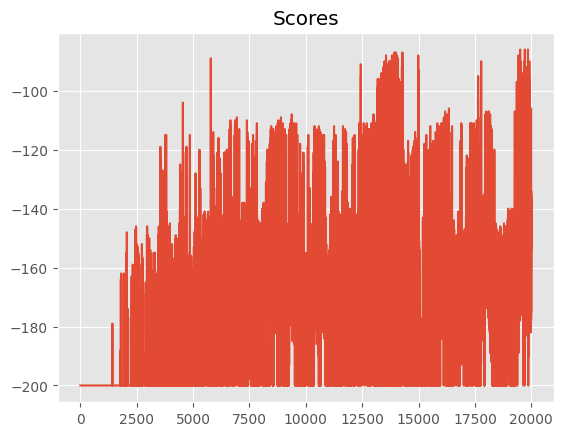

In [18]:
plt.plot(scores); plt.title("Scores");

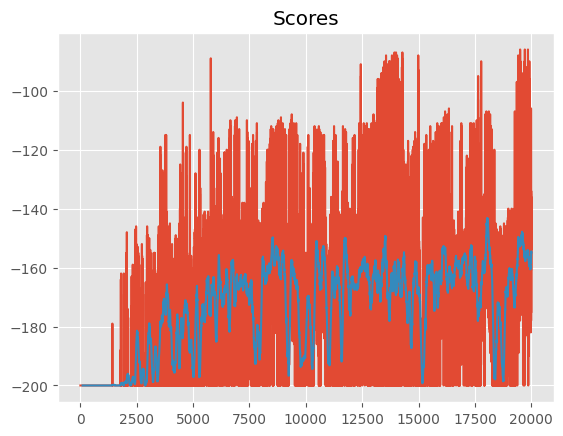

In [19]:
def plot_scores(scores, rolling_window=100):
  plt.plot(scores); plt.title("Scores");
  rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
  plt.plot(rolling_mean);
  return rolling_mean

rolling_mean = plot_scores(scores)

[TEST] Completed 100 episodes with avg. score = -151.63


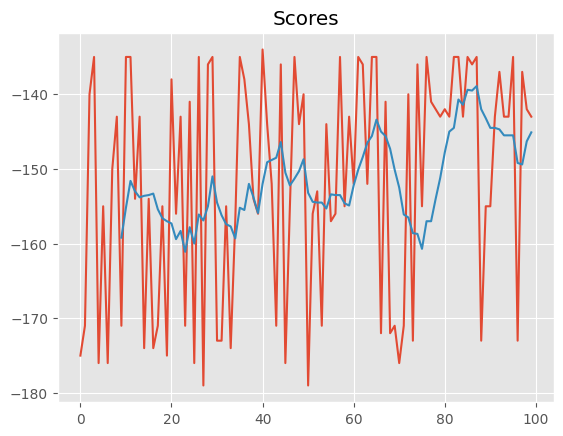

In [20]:
test_scores = run(q_agent, env, num_episodes=100, mode='test')
print("[TEST] Completed {} episodes with avg. score = {}".format(len(test_scores), np.mean(test_scores)))
_ = plot_scores(test_scores, rolling_window=10)

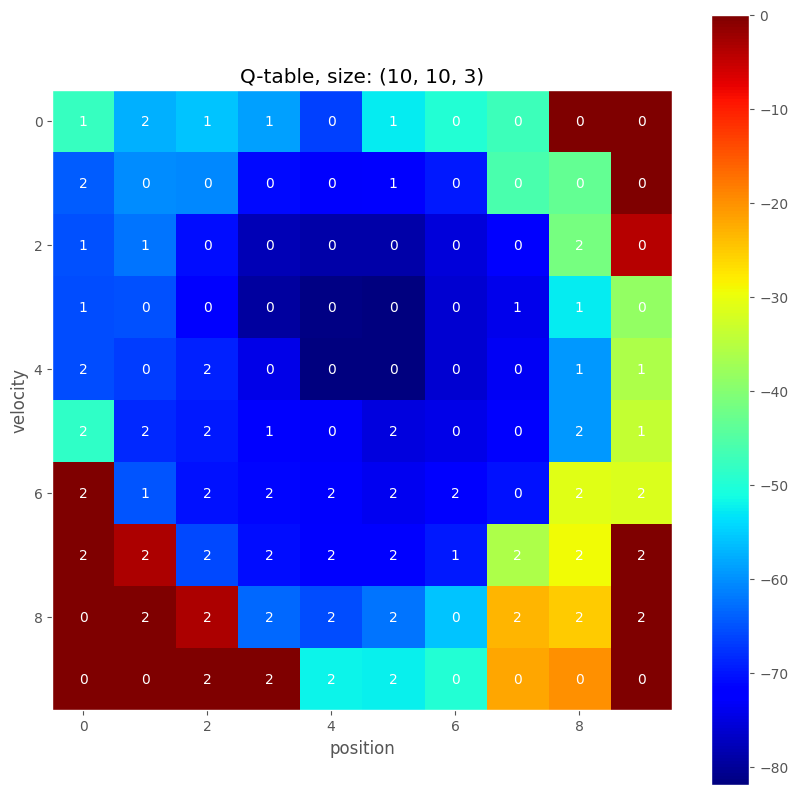

In [21]:
def plot_q_table(q_table):
  q_image = np.max(q_table, axis=2)       
  q_actions = np.argmax(q_table, axis=2) 

  fig, ax = plt.subplots(figsize=(10, 10))
  cax = ax.imshow(q_image, cmap='jet');
  cbar = fig.colorbar(cax)
  for x in range(q_image.shape[0]):
      for y in range(q_image.shape[1]):
          ax.text(x, y, q_actions[x, y], color='white',
                  horizontalalignment='center', verticalalignment='center')
  ax.grid(False)
  ax.set_title("Q-table, size: {}".format(q_table.shape))
  ax.set_xlabel('position')
  ax.set_ylabel('velocity')


plot_q_table(q_agent.q_table)

In [22]:
state_grid_new = create_uniform_grid(env.observation_space.low, env.observation_space.high, bins=(20, 20))
q_agent_new = QLearningAgent(env, state_grid_new)
q_agent_new.scores = []

Environment: <TimeLimit<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<MountainCarEnv<MountainCar-v0>>>>>>
State space size: (20, 20)
Action space size: 3
Q table size: (20, 20, 3)


Episode 50000/50000 | Max Average Score: -114.51

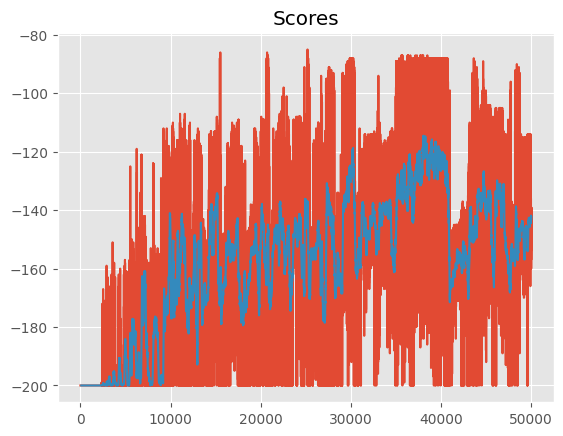

In [23]:
q_agent_new.scores += run(q_agent_new, env, num_episodes=50000)
rolling_mean_new = plot_scores(q_agent_new.scores)

[TEST] Completed 100 episodes with avg. score = -154.84


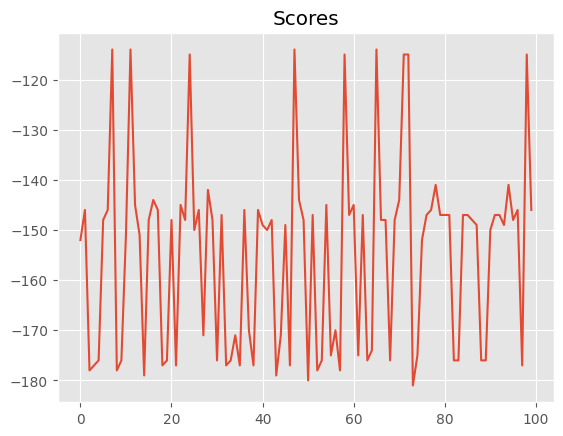

In [24]:
test_scores = run(q_agent_new, env, num_episodes=100, mode='test')
print("[TEST] Completed {} episodes with avg. score = {}".format(len(test_scores), np.mean(test_scores)))
_ = plot_scores(test_scores)

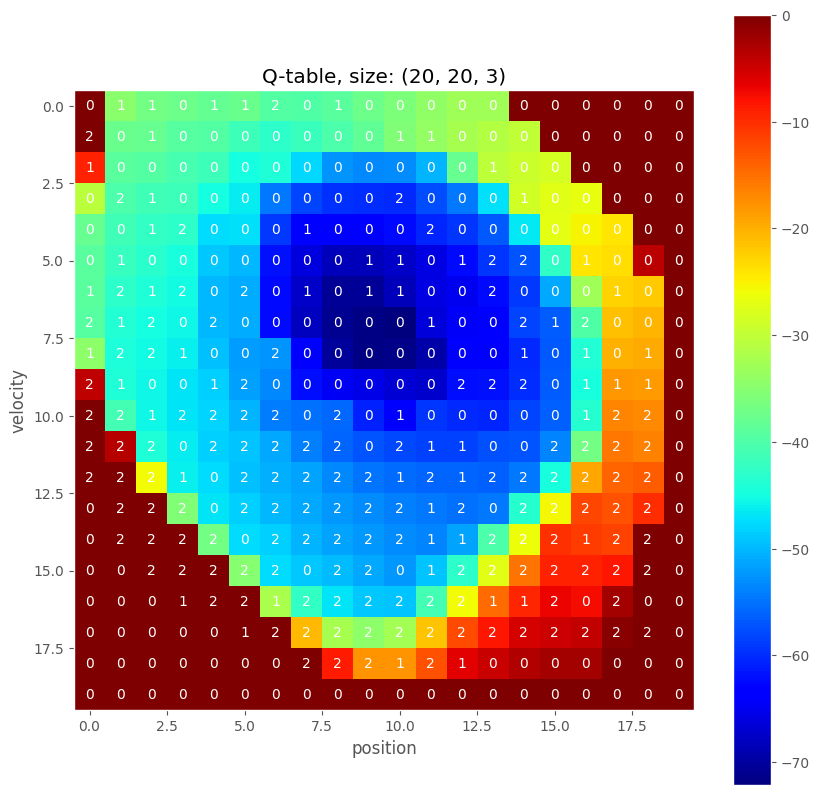

In [25]:
plot_q_table(q_agent_new.q_table)